In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
dataset=pd.read_csv("/Users/eupirate/Documents/DA_L7/L7_term2/visualization/wk6_in_class_fb-averages.csv")
dataset

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


In [4]:
# we need to convert the Date column into dates ( above shows as an object )
# we need to convert to date and time format

dataset["ds"]=pd.to_datetime(dataset["ds"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2905 non-null   datetime64[ns]
 1   y       2905 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.5 KB


In [5]:
# we set the column "Date" as the index

dataset.set_index("ds",inplace=True)

In [6]:
# we change size of graph -> we use this methods when we have multiple groups of figures

plt.rcParams["figure.figsize"]=[8,4]
plt.rcParams["figure.dpi"]=100

Text(0.5, 1.0, 'FB Times')

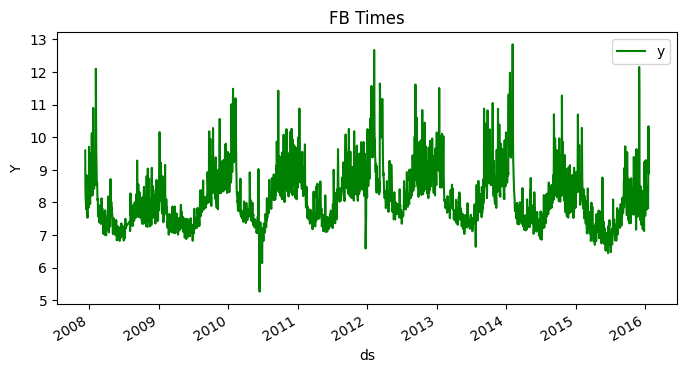

In [7]:
dataset.plot(color='green')
plt.ylabel('Y')
plt.title('FB Times')
## export as a jpg image
#plt.savefig("Temperature Time Series Plot.jpg")

Text(0.5, 1.0, 'FB Times')

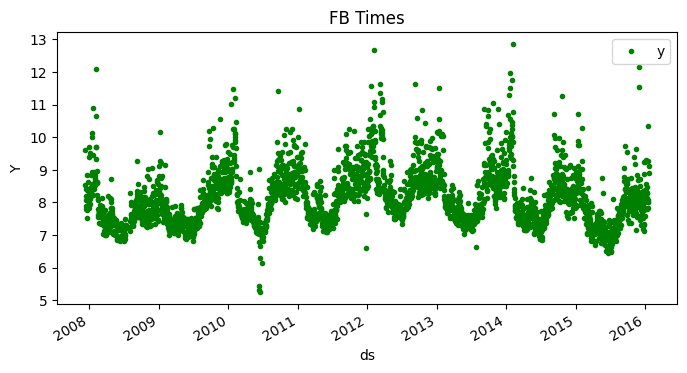

In [8]:
# create a different style
dataset.plot(style=".",color="green")
plt.ylabel("Y")
plt.title("FB Times")

# we create subplots

In [9]:
group=dataset.groupby(pd.Grouper(freq="A"))
group

In [10]:
keys=group.groups.keys()
keys

dict_keys([Timestamp('2007-12-31 00:00:00'), Timestamp('2008-12-31 00:00:00'), Timestamp('2009-12-31 00:00:00'), Timestamp('2010-12-31 00:00:00'), Timestamp('2011-12-31 00:00:00'), Timestamp('2012-12-31 00:00:00'), Timestamp('2013-12-31 00:00:00'), Timestamp('2014-12-31 00:00:00'), Timestamp('2015-12-31 00:00:00'), Timestamp('2016-12-31 00:00:00')])

In [11]:
for key in keys:
    print(key)
key

2007-12-31 00:00:00
2008-12-31 00:00:00
2009-12-31 00:00:00
2010-12-31 00:00:00
2011-12-31 00:00:00
2012-12-31 00:00:00
2013-12-31 00:00:00
2014-12-31 00:00:00
2015-12-31 00:00:00
2016-12-31 00:00:00


Timestamp('2016-12-31 00:00:00')

In [12]:
group.get_group(key)["y"].values

array([ 7.58933582,  7.82524529,  8.24931375,  9.29514097,  8.56826646,
        8.35255437,  8.29579811,  8.29029259,  7.7857209 ,  8.28172399,
        8.47073032,  8.13505391,  8.06714904,  8.02355239,  8.02191278,
        7.81722279,  9.27387839, 10.33377535,  9.12587122,  8.89137401])

In [13]:
y=pd.DataFrame()
for i in keys:
    y[key]=group.get_group(key)["y"].values
y

,2016-12-31
0,7.589336
1,7.825245
2,8.249314
3,9.295141
4,8.568266
5,8.352554
6,8.295798
7,8.290293
8,7.785721
9,8.281724


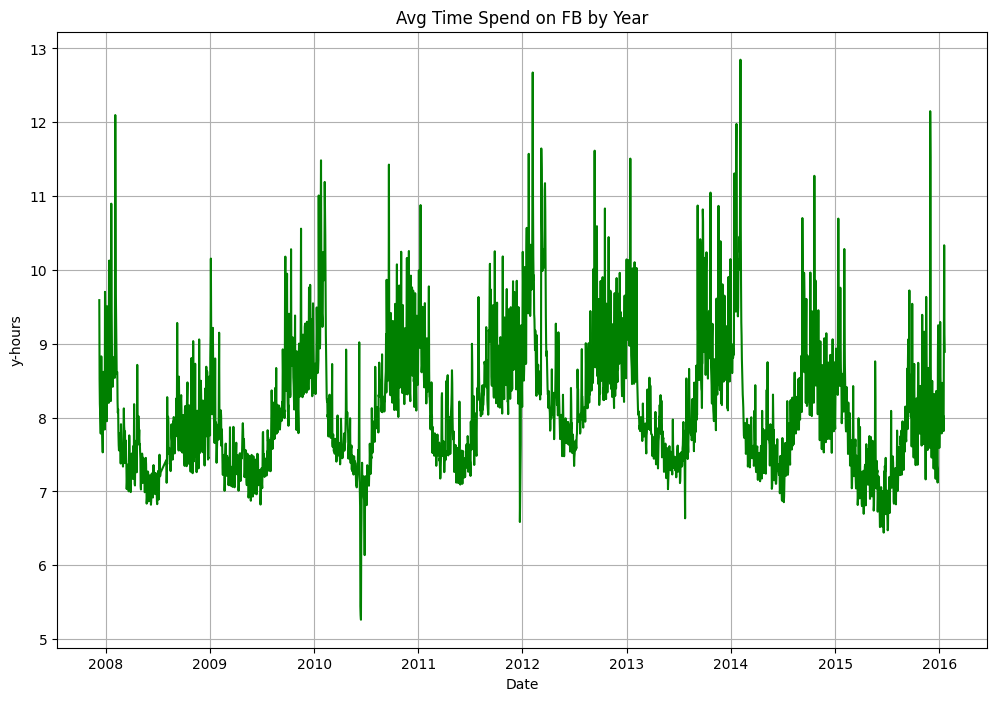

In [14]:
plt.figure(figsize=(12,8))
plt.plot(dataset.index,dataset["y"],label="Avg Time Spent on FB by Year",color="green")
plt.title("Avg Time Spend on FB by Year")
plt.xlabel("x-year")
plt.ylabel("y-hours")
plt.grid(True)